## **READ** **DATA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#df.to_csv("golf_cars.csv",encoding="utf-8")
df=pd.read_csv('vw_golf_cars_v3_encoded.csv')
df.head()

,Unnamed: 0,price_try,year,km,gear_type,fuel,body_type,color,from_,wheel_drive,engSize_cc,engPower_hp,avg_fuel_lt,painted,changed
0,0,940000,2017,120000,2,0,1,6,0,1,999,110,4.8,0,0
1,1,490000,2005,198000,0,0,1,11,0,1,1598,115,6.7,0,0
2,2,625000,2012,290000,0,1,1,16,1,1,1598,105,4.5,1,0
3,3,355000,2000,305000,0,3,1,2,1,1,1595,101,7.6,0,0
4,4,420000,2007,317000,2,0,1,9,1,1,1598,115,8.0,11,0


In [ ]:
df.shape

(1603, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1603 non-null   int64  
 1   price_try    1603 non-null   int64  
 2   year         1603 non-null   int64  
 3   km           1603 non-null   int64  
 4   gear_type    1603 non-null   int64  
 5   fuel         1603 non-null   int64  
 6   body_type    1603 non-null   int64  
 7   color        1603 non-null   int64  
 8   from_        1603 non-null   int64  
 9   wheel_drive  1603 non-null   int64  
 10  engSize_cc   1603 non-null   int64  
 11  engPower_hp  1603 non-null   int64  
 12  avg_fuel_lt  1603 non-null   float64
 13  painted      1603 non-null   int64  
 14  changed      1603 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 188.0 KB


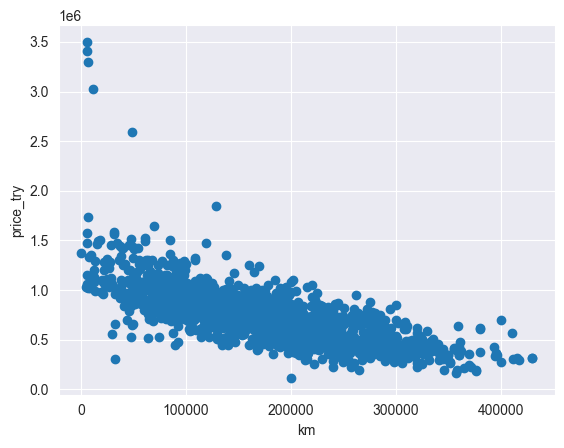

In [ ]:
x=df['km'].values
y=df['price_try'].values

plt.scatter(x,y)
plt.xlabel('km')
plt.ylabel('price_try')
plt.show()

In [ ]:
df['price_try'].max()

3500000

In [ ]:
df.corr()

,Unnamed: 0,price_try,year,km,gear_type,fuel,body_type,color,from_,wheel_drive,engSize_cc,engPower_hp,avg_fuel_lt,painted,changed
Unnamed: 0,1.000000,-0.006708,-0.026317,0.004927,-0.029091,0.023665,-0.036995,-0.004211,0.350612,0.022321,-0.022867,-0.004297,0.054039,0.006707,0.063340
price_try,-0.006708,1.000000,0.804392,-0.714356,0.504199,-0.358568,0.129300,-0.168069,-0.189441,-0.206766,-0.270327,0.556203,-0.358852,-0.295208,-0.226604
year,-0.026317,0.804392,1.000000,-0.709474,0.417121,-0.488909,0.203043,-0.288527,-0.152185,0.048769,-0.440014,0.303934,-0.442745,-0.241418,-0.166049
km,0.004927,-0.714356,-0.709474,1.000000,-0.354978,0.455729,-0.117063,0.196712,0.092040,-0.024062,0.490863,-0.310969,0.262207,0.254560,0.182321
gear_type,-0.029091,0.504199,0.417121,-0.354978,1.000000,-0.177385,0.085488,-0.037640,-0.196761,0.008915,-0.083918,0.278060,-0.205879,-0.107417,-0.070277
fuel,0.023665,-0.358568,-0.488909,0.455729,-0.177385,1.000000,-0.147184,0.150497,0.052462,0.014005,0.435572,-0.298868,0.259619,0.135763,0.097784
body_type,-0.036995,0.129300,0.203043,-0.117063,0.085488,-0.147184,1.000000,-0.069163,-0.056183,0.059858,-0.067131,-0.019506,-0.131966,0.020585,-0.002381
color,-0.004211,-0.168069,-0.288527,0.196712,-0.037640,0.150497,-0.069163,1.000000,0.049373,-0.056783,0.155216,0.076373,0.258854,0.096573,0.077460
from_,0.350612,-0.189441,-0.152185,0.092040,-0.196761,0.052462,-0.056183,0.049373,1.000000,0.042728,-0.004664,-0.116418,0.090085,0.103819,0.099827
wheel_drive,0.022321,-0.206766,0.048769,-0.024062,0.008915,0.014005,0.059858,-0.056783,0.042728,1.000000,-0.217011,-0.390416,-0.051951,0.032254,0.021974


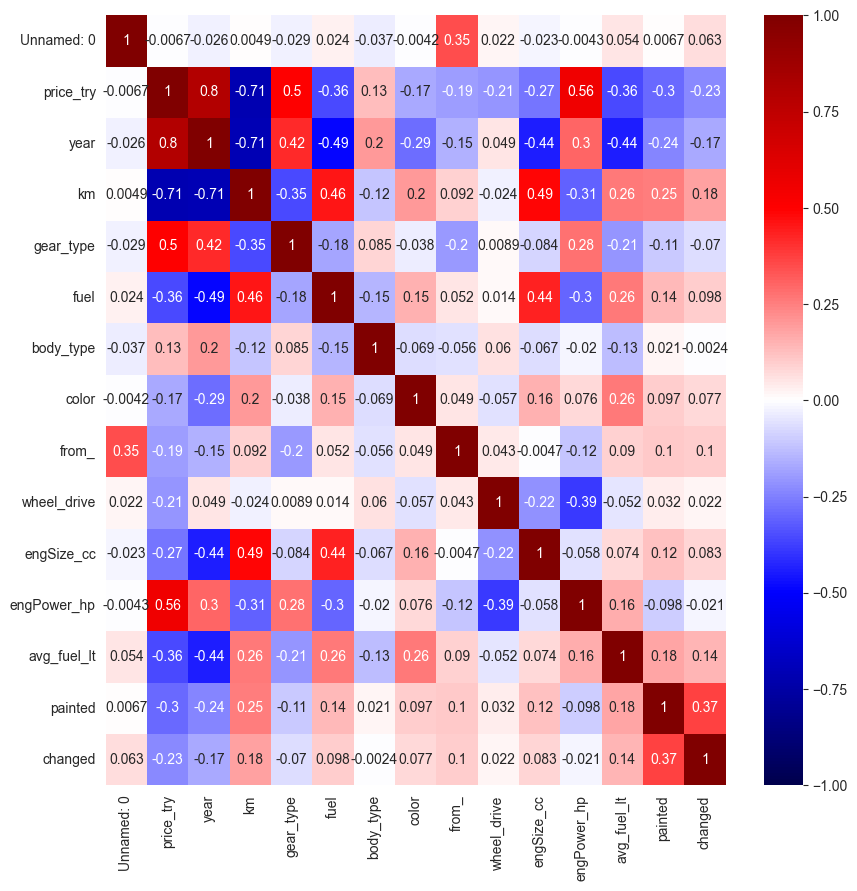

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

# **REGRESSION**#

In [ ]:
df=pd.read_csv('vw_golf_cars_v3_encoded.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)
Xs=df.drop('price_try',axis=1)
ys=df['price_try'].values

X, X_test, y, y_test = train_test_split(Xs,ys,test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)

lm = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_ridge = Ridge(alpha=10,max_iter=100)
lm_lasso = Lasso(alpha=10,max_iter=100)

lm.fit(X_train, y_train)
lm_ridge.fit(X_train_scaled, y_train)
lm_lasso.fit(X_train,y_train)



Lasso(alpha=10, max_iter=100)

In [ ]:
#mse = np.mean((pred - y_train)**2)

In [ ]:
print(f'Linear Regression for all data R^2: {lm.score(Xs, ys):.6f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

print(f'Ridge Regression for test data R^2: {lm_ridge.score(X_test_scaled, y_test):.6f}')
print(f'Ridge Regression for validation data R^2: {lm_ridge.score(X_val_scaled, y_val):.6f}')
print("")

print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

Linear Regression for all data R^2: 0.845194
Linear Regression for test data R^2: 0.836111
Linear Regression for validation data R^2: 0.860609

Ridge Regression for test data R^2: 0.835456
Ridge Regression for validation data R^2: 0.859823

Lasso Regression for test data R^2: 0.836195
Lasso Regression for validation data R^2: 0.860534


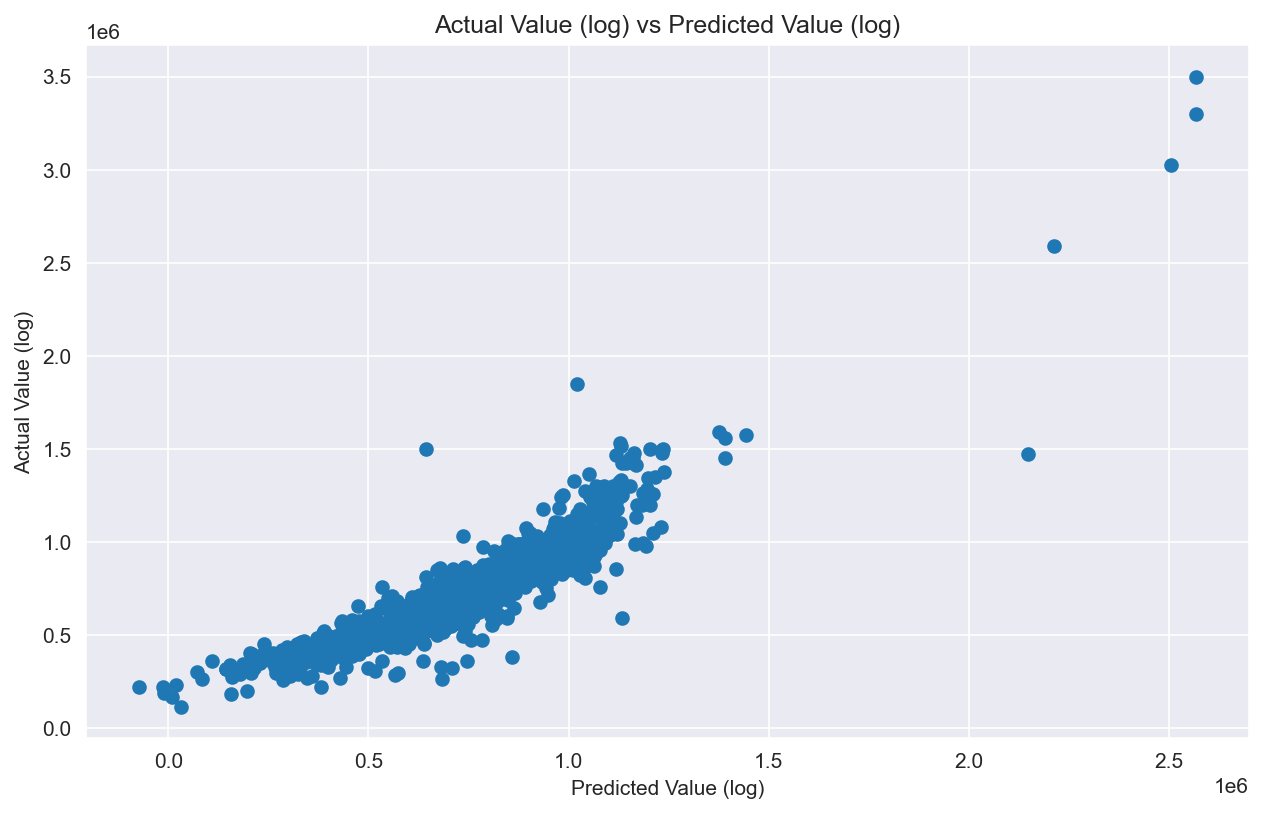

In [ ]:
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(X,y);
pred = lr.predict(X)
plt.scatter(pred,y)
plt.title("Actual Value (log) vs Predicted Value (log)")
plt.xlabel("Predicted Value (log)")
plt.ylabel("Actual Value (log)")
plt.show()

#**TESTİNG**


In [ ]:
lreg3 = LinearRegression()
X_train_rs = scaler.fit_transform(X.values)
x_test_rs = scaler.fit_transform(X_test.values)
lreg3.fit(X_train_rs,y)


LinearRegression()

# **PREDICT**

In [ ]:
test_data = pd.read_csv('test_cars_encoded.csv')
test_data.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
test_data

,price_try,year,km,gear_type,fuel,body_type,color,from_,wheel_drive,engSize_cc,engPower_hp,avg_fuel_lt,painted,changed
0,1380000,2017,27500,2,0,1,1,1,0,1395,125,5.3,0,0
1,1080000,2016,102000,2,1,1,1,1,0,1598,110,3.9,0,0
2,675000,2015,137000,0,1,1,5,1,0,1598,110,3.8,2,1
3,1133000,2018,88000,2,1,1,1,1,0,1598,115,4.2,0,0
4,610000,2012,270000,0,1,1,10,1,0,1598,90,4.5,8,0
5,1220000,2017,90000,2,1,1,1,1,0,1598,115,4.2,0,0
6,1065000,2017,120735,2,1,1,10,1,0,1598,115,4.2,0,0
7,875000,2017,154000,2,1,1,1,1,0,1598,115,4.2,0,0
8,735000,2015,116750,0,0,1,10,1,0,1197,105,4.9,0,2
9,730000,2014,236000,0,1,1,1,0,0,1598,90,3.8,0,0


In [ ]:
actual_price =test_data['price_try'].values
actual_price = np.array(actual_price, dtype=int)

new_test = test_data.drop('price_try', axis=1)
test = scaler.fit_transform(new_test.values)

pred_price = lreg3.predict(test)
# Tam kısmı almak için
pred_price = np.array(pred_price, dtype=int)

In [ ]:
pred_price

array([1107193,  973210,  817959, 1063253,  437146, 1039136, 1012215,
        969835,  701232,  575705,  496092,  196062,  815896,  253138,
        957924,  765764,  453244,  840137, 1426653,  731010,  679044,
       1001445,  139831,  753612,  428714,  262520,  586250, 1126328,
        726512,  827376,  813368,  990919,  326053,  542439,  882253,
        892077,  792503, 1097064,  628453,  899093,  408657,  929907,
        763747,  306301, 1012167, 1010754,  467928,  702573,  927732,
        699920])

In [ ]:
test_data['Prediction'] = pred_price
test_data

,price_try,year,km,gear_type,fuel,body_type,color,from_,wheel_drive,engSize_cc,engPower_hp,avg_fuel_lt,painted,changed,Prediction
0,1380000,2017,27500,2,0,1,1,1,0,1395,125,5.3,0,0,1107193
1,1080000,2016,102000,2,1,1,1,1,0,1598,110,3.9,0,0,973210
2,675000,2015,137000,0,1,1,5,1,0,1598,110,3.8,2,1,817959
3,1133000,2018,88000,2,1,1,1,1,0,1598,115,4.2,0,0,1063253
4,610000,2012,270000,0,1,1,10,1,0,1598,90,4.5,8,0,437146
5,1220000,2017,90000,2,1,1,1,1,0,1598,115,4.2,0,0,1039136
6,1065000,2017,120735,2,1,1,10,1,0,1598,115,4.2,0,0,1012215
7,875000,2017,154000,2,1,1,1,1,0,1598,115,4.2,0,0,969835
8,735000,2015,116750,0,0,1,10,1,0,1197,105,4.9,0,2,701232
9,730000,2014,236000,0,1,1,1,0,0,1598,90,3.8,0,0,575705


In [ ]:
actual_price

array([1380000, 1080000,  675000, 1133000,  610000, 1220000, 1065000,
        875000,  735000,  730000,  430000,  270000,  950000,  438000,
       1100000,  730000,  550000,  895000, 1550000,  810000,  750000,
       1094000,  375000,  785000,  540000,  367500,  595000, 1529000,
        880000,  885000,  950000,  895000,  460000,  370000,  950000,
        675000,  765000, 1120000,  669000,  849900,  490000,  895000,
        599750,  425000,  940000,  920000,  520000,  795000,  975000,
        745000])

In [ ]:
#test_data[['price_try', 'Prediction']]

In [ ]:
#test_data['Error_rate'] = (test_data['price_try'] / test_data['Prediction'])

In [ ]:
#test_data['Error_rate'] = np.where(test_data['price_try'] >= test_data['Prediction'], test_data['price_try'] / test_data['Prediction'],test_data['Prediction'] / test_data['price_try'])


In [ ]:
test_data['Error'] = ((test_data['price_try'] - test_data['Prediction'] ) /  test_data['price_try'])


In [ ]:
test_data[['price_try', 'Prediction','Error']]

,price_try,Prediction,Error
0,1380000,1107193,0.197686
1,1080000,973210,0.098880
2,675000,817959,-0.211791
3,1133000,1063253,0.061560
4,610000,437146,0.283367
5,1220000,1039136,0.148249
6,1065000,1012215,0.049563
7,875000,969835,-0.108383
8,735000,701232,0.045943
9,730000,575705,0.211363


In [ ]:
#mse = np.mean((pred_price - actual_price)**2)